# Unit 6 | Assignment - What's the Weather Like? - WeatherPy
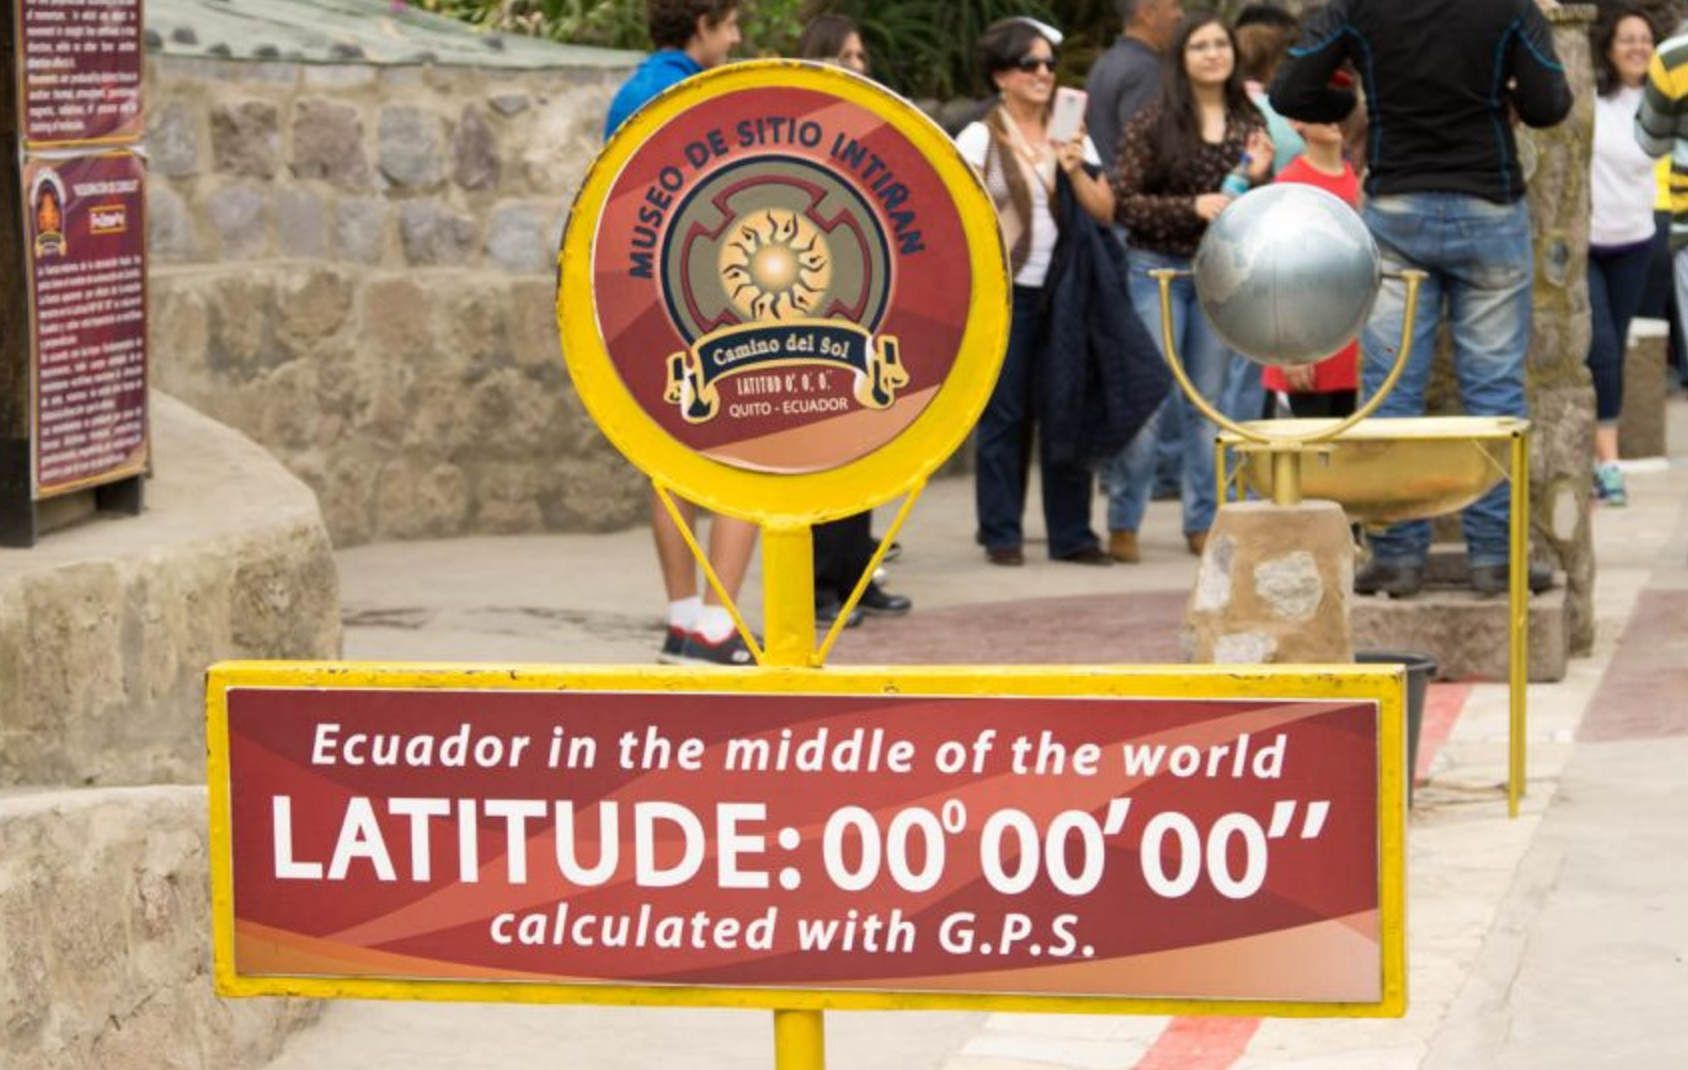

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API Key
from api_keys import api_key

# Incorporated Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -42.02,
        "lat": -22.97
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 89.73,
        "pressure": 1013,
        "humidity": 58,
        "temp_min": 86,
        "temp_max": 93.2
    },
    "visibility": 10000,
    "wind": {
        "speed": 24.16,
        "deg": 90
    },
    "clouds": {
        "all": 0
    },
    "dt": 1549036800,
    "sys": {
        "type": 1,
        "id": 8326,
        "message": 0.008,
        "country": "BR",
        "sunrise": 1549009693,
        "sunset": 1549056897
    },
    "id": 3471451,
    "name": "Arraial do Cabo",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ushuaia
Processing Record 2 | Fairbanks
Processing Record 3 | Junction City
Processing Record 4 | Biak
Processing Record 5 | Kodiak
Processing Record 6 | Bam
Processing Record 7 | Pitiquito
Processing Record 8 | Chokurdakh
Processing Record 9 | Lebu
Processing Record 10 | Chara
City not found. Skipping...
Processing Record 11 | Broken Hill
Processing Record 12 | Bredasdorp
City not found. Skipping...
Processing Record 13 | Atuona
Processing Record 14 | Kapaa
Processing Record 15 | Kibala
Processing Record 16 | Albany
Processing Record 17 | Saint-Philippe
Processing Record 18 | Dikson
Processing Record 19 | Ponta Delgada
Processing Record 20 | Hobart
Processing Record 21 | Kavaratti
Processing Record 22 | Port Augusta
Processing Record 23 | Necochea
Processing Record 24 | Arraial do Cabo
Processing Record 25 | Te Anau
Processing Record 26 | Victoria
Processing Record 27 | Hithadhoo
Processing Record 28 | Sask

Processing Record 228 | Ayan
Processing Record 229 | Aleksandrov Gay
Processing Record 230 | Japura
Processing Record 231 | Marawi
Processing Record 232 | Salinopolis
Processing Record 233 | Sorrento
Processing Record 234 | Cunha
Processing Record 235 | Talnakh
Processing Record 236 | Havelock
Processing Record 237 | Koumac
Processing Record 238 | Baghdad
Processing Record 239 | Ust-Nera
Processing Record 240 | Qarqin
Processing Record 241 | Tabou
Processing Record 242 | Baie-Comeau
Processing Record 243 | Jiazi
City not found. Skipping...
Processing Record 244 | Cherskiy
Processing Record 245 | Nandikotkur
Processing Record 246 | Mwinilunga
Processing Record 247 | Longyearbyen
Processing Record 248 | Beppu
Processing Record 249 | Coahuayana
Processing Record 250 | Mao
Processing Record 251 | Mutis
City not found. Skipping...
City not found. Skipping...
Processing Record 252 | Calbuco
City not found. Skipping...
Processing Record 253 | Bethel
City not found. Skipping...
Processing Reco

Processing Record 454 | Gaoua
Processing Record 455 | Pacific Grove
Processing Record 456 | Totness
Processing Record 457 | Mocuba
Processing Record 458 | Kwekwe
Processing Record 459 | Bin Qirdan
Processing Record 460 | Golpayegan
Processing Record 461 | Ukiah
Processing Record 462 | Sabzevar
Processing Record 463 | Flinders
Processing Record 464 | Lompoc
Processing Record 465 | Markova
Processing Record 466 | Tual
Processing Record 467 | Pangoa
City not found. Skipping...
Processing Record 468 | Coro
Processing Record 469 | Zaragoza
Processing Record 470 | Ayagoz
Processing Record 471 | Guiratinga
Processing Record 472 | Stokmarknes
Processing Record 473 | Karratha
Processing Record 474 | Troitsko-Pechorsk
Processing Record 475 | Dong Hoi
Processing Record 476 | Presidencia Roque Saenz Pena
Processing Record 477 | Innisfail
Processing Record 478 | Saint Anthony
Processing Record 479 | Apiai
Processing Record 480 | Reconquista
Processing Record 481 | Bonavista
Processing Record 482 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               572
Country            572
Date               572
Latitude           572
Longitude          572
Max Temperature    572
Humidity           572
Cloudiness         572
Wind Speed         572
dtype: int64

In [7]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,1549040400,-54.81,-68.31,50.00,53,40,25.28
1,Fairbanks,US,1549040280,64.84,-147.72,-19.13,76,1,3.36
2,Junction City,US,1549040160,39.03,-96.83,41.54,65,1,6.40
3,Biak,ID,1549041264,-0.91,122.88,79.58,95,68,2.04
4,Kodiak,US,1549040100,39.95,-94.76,24.80,35,1,9.17


In [8]:
# Export & Save Data Into a .csv.
weather_data.to_csv("./Data/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

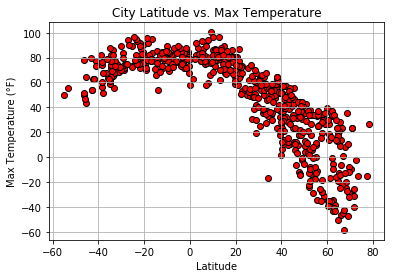

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

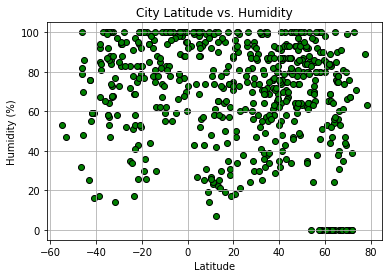

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

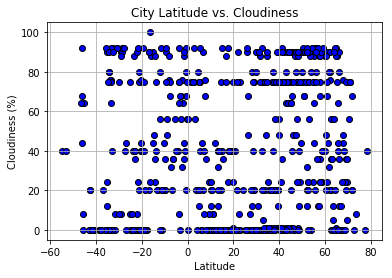

In [11]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

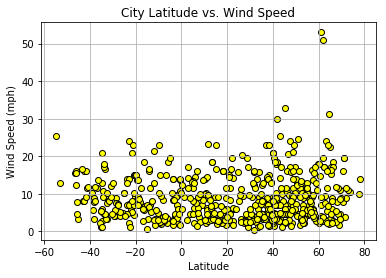

In [12]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()